In [9]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

In [10]:


model = DiscreteBayesianNetwork([
    ('O', 'H'),
    ('W', "R"),
    ('H', 'E'),
    ('O', 'W'),
    ('H', 'R'),
    ('W', 'R'),
    ('R', 'C')
])

cpd_o = TabularCPD(variable = 'O', variable_card = 2, values = [[0.3], [0.7]])
cpd_h = TabularCPD(variable = 'H',
                    variable_card = 2,
                    values = [
                        [0.9, 0.1],
                        [0.1, 0.9]
                    ],
                    evidence = ['O'],
                    evidence_card = [2]
                    )
cpd_w = TabularCPD(variable = 'W',
                    variable_card = 2, 
                    values = [
                        [0.1, 0.6],
                        [0.9, 0.4]
                    ],
                    evidence = ['O'],
                    evidence_card = [2]
                    ) 
cpd_r = TabularCPD(variable = 'R',
                    variable_card = 2, 
                    values = [
                        [0.6, 0.9, 0.3, 0.5],
                        [0.4, 0.1, 0.7, 0.5]
                    ],
                    evidence = ['H', 'W'],
                    evidence_card = [2, 2]
                    )

cpd_e = TabularCPD(variable = 'E',
                    variable_card = 2, 
                    values = [
                        [0.8, 0.2],
                        [0.2, 0.8]
                    ],
                    evidence = ['H'],
                    evidence_card = [2]
                    ) 
cpd_c = TabularCPD(variable = 'C',
                    variable_card = 2, 
                    values = [
                        [0.85, 0.4],
                        [0.15, 0.6]
                    ],
                    evidence = ['R'],
                    evidence_card = [2]
                    ) 


In [11]:
model.add_cpds(cpd_o, cpd_h, cpd_w, cpd_r, cpd_e, cpd_c)

model.check_model()

True

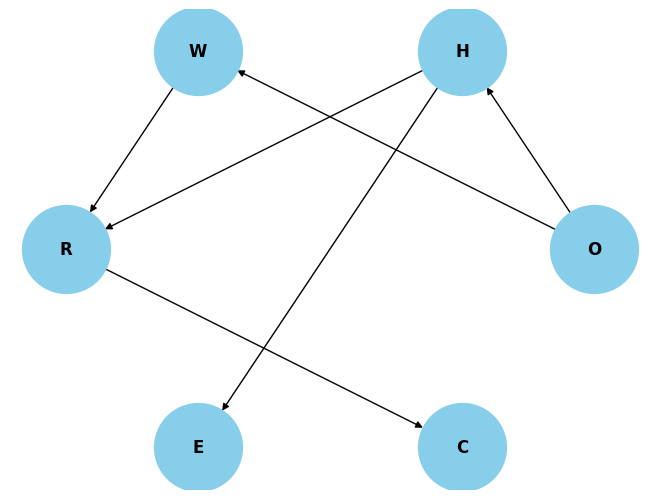

In [ ]:
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='skyblue')
plt.show()

#)a

In [ ]:
model.local_independencies(['H', 'W', 'R', 'E', 'C', 'O'])

#c) explicatia e pe foaie

d_separated = model.is_dconnected('W', 'E', observed=['H'])
print(f"W is d-separated from E given H: {not d_separated}")


d_separated = model.is_dconnected('O', 'C', observed=['R'])
print(f"O is d-separated from C given R: {not d_separated}")


W is d-separated from E given H: True
W is d-separated from E given H: True


In [ ]:
from pgmpy.inference import VariableElimination

# in acest caz, cum este dat in cerinta, yes = 0, no = 1, pentru a nu ma incurca

#b)

infer = VariableElimination(model)
posterior_p = infer.query(['H'], evidence= {'C': 0})
print(f"P(H=yes|C=comfortable) = {posterior_p}")

posterior_p = infer.query(['E'], evidence= {'C': 0})
print(f"P(H=yes|C=comfortable) = {posterior_p}")

map_query = infer.map_query(variables=['H', 'W'], evidence={'C': 0})
print(f"MAP for (H, C) given C=comfortable: {map_query}")

P(H=yes|C=comfortable) = +------+----------+
| H    |   phi(H) |
+======+==========+
| H(0) |   0.4114 |
+------+----------+
| H(1) |   0.5886 |
+------+----------+
P(H=yes|C=comfortable) = +------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.4469 |
+------+----------+
| E(1) |   0.5531 |
+------+----------+


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

MAP for (H, C) given C=comfortable: {'H': 0, 'W': 1}
